In [1]:
from flask import Flask, flash, request, redirect, url_for,render_template
from flask import send_file

import os
from flask_cors import CORS, cross_origin
from cnnClassifier.utils.common import decodeImage
from cnnClassifier.pipeline.hide_prediction import HidePredictionPipeline
from cnnClassifier.pipeline.reveal_prediction import RevealPredictionPipeline
from PIL import Image
import numpy as np
UPLOAD_FOLDER = 'static'
ALLOWED_EXTENSIONS = {'txt', 'pdf', 'png', 'jpg', 'jpeg', 'gif'}
os.putenv('LANG', 'en_US.UTF-8')
os.putenv('LC_ALL', 'en_US.UTF-8')
def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS
app = Flask(__name__)
CORS(app)

class ClientApp:
    def __init__(self):
        self.secret = "static\images\secret.jpg"
        self.cover = "static\images\cover.jpg"
        self.coverout = "static\images\Coverout.jpg"
        self.toreveal = r"static\images\toreveal.jpg"
        self.secretout = r"static\images\secretout.jpg"
        self.hideclassifier = HidePredictionPipeline(self.secret, self.cover)
        self.revealclassifier = RevealPredictionPipeline()

clApp = ClientApp()

In [2]:
%pwd

'c:\\Users\\08you\\Desktop\\My own 3 hour project\\Securing-Medical-Data-Transfer-Using-Deep-Steganography-and-Cryptography-MLflow-DVC'

In [1]:
import os 
os.chdir("../")


In [7]:
clApp.revealclassifier.predict(clApp.toreveal)

AttributeError: 'JpegImageFile' object has no attribute 'shape'

In [12]:
from tensorflow.keras.preprocessing import image

img =image.load_img(clApp.toreveal, target_size = (224,224))

In [18]:
import numpy as np 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from cnnClassifier.utils.common import custom_loss_1,custom_loss_2,gray_to_rgb,normalize_batch,denormalize_batch
import os
import tensorflow  as tf
reveal= tf.keras.models.load_model(
    "artifacts/split_model/reveal.h5",custom_objects={'custom_loss_2': custom_loss_2,'custom_loss_1': custom_loss_1}
    , compile=False
)
if len(img.split()) != 3:
    img = gray_to_rgb(img)
secretout=reveal.predict(np.reshape(img,(1,224,224,3)))

1/1 [==============================] - 1s 1s/step


In [26]:
import numpy as np 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from cnnClassifier.utils.common import custom_loss_1,custom_loss_2,gray_to_rgb,normalize_batch,denormalize_batch
import os
from PIL import Image
import cv2
import tensorflow  as tf
# load model
hide= tf.keras.models.load_model(
            "artifacts/split_model/hiding.h5",custom_objects={'custom_loss_2': custom_loss_2,'custom_loss_1': custom_loss_1}
            , compile=False
        )

source=np.array(Image.open("static\images\secret.jpg"))
# Check if the images are grayscale, and convert to RGB if necessary
cover=np.array(Image.open("static\images\cover.jpg"))

source=cv2.resize(source, (224,224))
cover=cv2.resize(cover, (224,224))
if source.shape[-1] != 3:
    source = gray_to_rgb(source)
# Plot input images
if cover.shape[-1] != 3:
    source = gray_to_rgb(source)
secret=np.array(source/255.0)
cover=np.array(cover/255.0)
coverout=hide.predict([normalize_batch(np.reshape(secret,(1,224,224,3))),normalize_batch(np.reshape(cover,(1,224,224,3)))])


1/1 [==============================] - 1s 1s/step


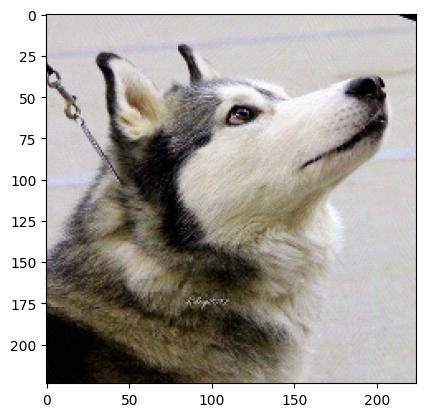

In [22]:
import  matplotlib.pyplot as plt
plt.imshow(coverout)

In [33]:
# load model
reveal= tf.keras.models.load_model(
    "artifacts/split_model/reveal.h5",custom_objects={'custom_loss_2': custom_loss_2,'custom_loss_1': custom_loss_1}
    , compile=False
)
coverout2=np.array(Image.open("static\images\Coverout.png"))
secretout=reveal.predict()


[2024-04-01 15:07:29,743: WARNING: polymorphic_function: 5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001B40DB6BCA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.]
1/1 [==============================] - 1s 635ms/step


In [31]:
normalize_batch(np.array(coverout2/255.0))

array([[[ 0.82755373,  1.20308123,  2.64      ],
        [ 1.32417159,  1.95588235,  1.5071024 ],
        [ 1.1357993 ,  1.36064426,  2.3611329 ],
        ...,
        [-1.94665639, -1.75560224, -1.75215686],
        [-1.99803065, -1.98319328, -1.76958606],
        [-1.92953164, -2.00070028, -1.69986928]],

       [[ 1.08442504,  2.09593838,  1.64653595],
        [ 0.82755373,  2.2535014 ,  1.66396514],
        [ 1.05017553,  2.32352941,  1.45481481],
        ...,
        [-1.9809059 , -1.91316527, -1.69986928],
        [-1.99803065, -1.86064426, -1.80444444],
        [-1.99803065, -1.96568627, -1.47328976]],

       [[ 1.47829437,  1.65826331,  1.62910675],
        [ 1.92353797,  1.23809524,  1.68139434],
        [ 1.39267061,  1.51820728,  1.71625272],
        ...,
        [-2.04940491, -2.03571429, -1.3687146 ],
        [-1.84390787, -1.86064426, -1.80444444],
        [-2.10077918, -1.98319328, -1.45586057]],

       ...,

       [[-2.11790393, -1.93067227, -1.80444444],
        [-2

In [27]:
coverout

array([[[[ 0.84097564,  1.208324  ,  2.6440182 ],
         [ 1.3365082 ,  1.9694237 ,  1.5083658 ],
         [ 1.1499177 ,  1.3659315 ,  2.3765016 ],
         ...,
         [-1.9421746 , -1.7466172 , -1.7369604 ],
         [-1.9960874 , -1.9772813 , -1.7544839 ],
         [-1.9230207 , -1.9962327 , -1.6844325 ]],

        [[ 1.0906619 ,  2.1047833 ,  1.6508347 ],
         [ 0.8327671 ,  2.2559354 ,  1.6671468 ],
         [ 1.0565704 ,  2.3316605 ,  1.4679428 ],
         ...,
         [-1.9751273 , -1.9038111 , -1.694222  ],
         [-1.9930028 , -1.8451939 , -1.865939  ],
         [-1.985269  , -1.9484776 , -1.4596735 ]],

        [[ 1.4838024 ,  1.6653414 ,  1.6293641 ],
         [ 1.9271244 ,  1.2403226 ,  1.6927873 ],
         [ 1.4052027 ,  1.5302718 ,  1.7294595 ],
         ...,
         [-2.0426087 , -2.0798254 , -1.3635527 ],
         [-1.8405021 , -1.8447508 , -1.8254657 ],
         [-2.0973852 , -1.9697949 , -1.4508978 ]],

        ...,

        [[-2.1052046 , -1.9236182 , -1

In [14]:
coverout = denormalize_batch(coverout)
coverout=np.squeeze(coverout)*255.0
coverout=np.uint8(coverout)
coverout=np.array(coverout/255.0)
print(coverout)

[[[0.6745098  0.7254902  1.        ]
  [0.78823529 0.89411765 0.74509804]
  [0.74509804 0.76078431 0.9372549 ]
  ...
  [0.03921569 0.0627451  0.01176471]
  [0.02745098 0.01176471 0.00784314]
  [0.04313725 0.00784314 0.02352941]]

 [[0.73333333 0.9254902  0.77647059]
  [0.6745098  0.96078431 0.78039216]
  [0.7254902  0.97647059 0.73333333]
  ...
  [0.03137255 0.02745098 0.02352941]
  [0.02745098 0.03921569 0.        ]
  [0.02745098 0.01568627 0.0745098 ]]

 [[0.82352941 0.82745098 0.77254902]
  [0.9254902  0.73333333 0.78431373]
  [0.80392157 0.79607843 0.79215686]
  ...
  [0.01568627 0.         0.09803922]
  [0.0627451  0.03921569 0.        ]
  [0.00392157 0.01176471 0.07843137]]

 ...

 [[0.         0.02352941 0.        ]
  [0.         0.         0.03137255]
  [0.01568627 0.01960784 0.        ]
  ...
  [0.78823529 0.76862745 0.78431373]
  [0.78823529 0.78823529 0.69803922]
  [0.76078431 0.76078431 0.81568627]]

 [[0.         0.02352941 0.        ]
  [0.         0.02745098 0.        ]


In [10]:
np.array(coverout/255.0)

array([[[0.6745098 , 0.7254902 , 1.        ],
        [0.78823529, 0.89411765, 0.74509804],
        [0.74509804, 0.76078431, 0.9372549 ],
        ...,
        [0.03921569, 0.0627451 , 0.01176471],
        [0.02745098, 0.01176471, 0.00784314],
        [0.04313725, 0.00784314, 0.02352941]],

       [[0.73333333, 0.9254902 , 0.77647059],
        [0.6745098 , 0.96078431, 0.78039216],
        [0.7254902 , 0.97647059, 0.73333333],
        ...,
        [0.03137255, 0.02745098, 0.02352941],
        [0.02745098, 0.03921569, 0.        ],
        [0.02745098, 0.01568627, 0.0745098 ]],

       [[0.82352941, 0.82745098, 0.77254902],
        [0.9254902 , 0.73333333, 0.78431373],
        [0.80392157, 0.79607843, 0.79215686],
        ...,
        [0.01568627, 0.        , 0.09803922],
        [0.0627451 , 0.03921569, 0.        ],
        [0.00392157, 0.01176471, 0.07843137]],

       ...,

       [[0.        , 0.02352941, 0.        ],
        [0.        , 0.        , 0.03137255],
        [0.01568627, 0

[2024-04-01 15:07:47,244: WARNING: image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).]


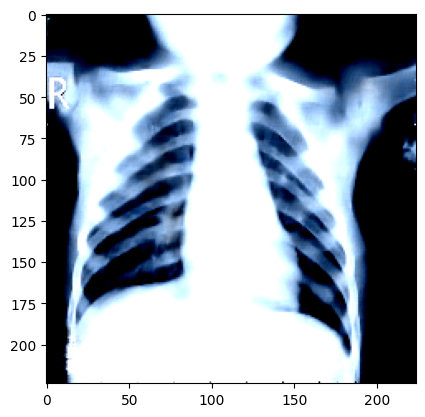

In [35]:

plt.imshow(secretout[0])
